# Extended Kalman filter for localizing Lidar data

In [1]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt

In [2]:
import ekfilter
import simulate_measurements

In [3]:
f_x = []
f_y = []
f_x_sig = []
f_y_sig = []
f_xv = []
f_yv = []
f_xv_sig = []
f_yv_sig = []
f_xv = []
f_yv = []
f_xv_sig = []
f_yv_sig = []

z = simulate_measurements.simulate_measurements()


In [4]:
for iii in range(0, len(z[5])):
    f = ekfilter.ekfilter(z, iii)
    f_x.append(f[0])
    f_y.append(f[1])
    f_xv.append(f[3])
    f_yv.append(f[4])
    f_x_sig.append(np.sqrt(f[2][0][0]))
    f_y_sig.append(np.sqrt(f[2][1][1]))

Text(0.5, 0, 'Update number (#)')

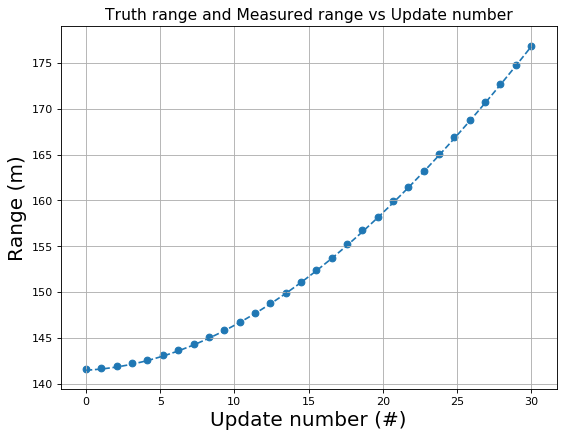

In [5]:
plot1 = plt.figure(figsize=(8, 6), dpi=80)
plt.grid(True)
plt.plot(z[5], z[3], linestyle='dashed')
plt.scatter(z[5], z[0])
plt.title('Truth range and Measured range vs Update number', fontsize=14)
plt.ylabel('Range (m)', fontsize=18)
plt.xlabel('Update number (#)', fontsize=18)

Text(0.5, 0, 'Update number (#)')

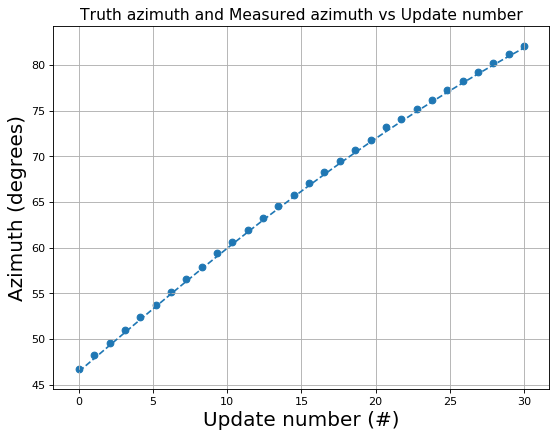

In [6]:
plot2 = plt.figure(figsize=(8, 6), dpi=80)
plt.grid(True)
plt.plot(z[5], z[4], linestyle='dashed')
plt.scatter(z[5], z[1])
plt.title('Truth azimuth and Measured azimuth vs Update number', fontsize=14)
plt.ylabel('Azimuth (degrees)', fontsize=18)
plt.xlabel('Update number (#)', fontsize=18)

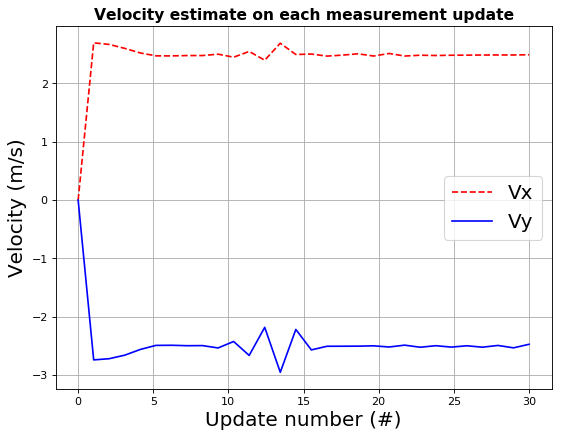

In [7]:
plot3 = plt.figure(figsize=(8, 6), dpi=80)
plt.grid(True)
plt.plot(z[5], f_xv, color="red", linestyle="dashed", label="Vx")
plt.plot(z[5], f_yv, color="blue", label="Vy")
plt.title('Velocity estimate on each measurement update', fontsize=14, fontweight="bold")
plt.ylabel('Velocity (m/s)', fontsize=18)
plt.xlabel('Update number (#)', fontsize=18)
plt.legend(fontsize=18)

In [8]:
e_x_err = []
e_x_3sig = []
e_x_3sig_neg = []
e_y_err = []
e_y_3sig = []
e_y_3sig_neg = []
for m in range(0, len(z[0])):
    e_x_err.append(f_x[m] - z[6][m])
    e_x_3sig.append(3*f_x_sig[m])
    e_x_3sig_neg.append(-3*f_x_sig[m])
    e_y_err.append(f_y[m] - z[7][m])
    e_y_3sig.append(3*f_y_sig[m])
    e_y_3sig_neg.append(-3*f_y_sig[m])

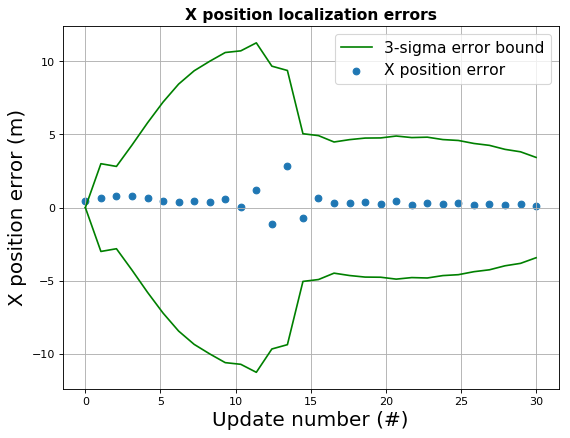

In [12]:
plot4 = plt.figure(figsize=(8, 6), dpi=80)
plt.grid(True)
line1 = plt.scatter(z[5], e_x_err, label="X position error")
line2 = plt.plot(z[5], e_x_3sig, color='green', linestyle="solid", label="3-sigma error bound")
plt.plot(z[5], e_x_3sig_neg, color='green', linestyle="solid")
plt.ylabel('X position error (m)', fontsize=18)
plt.xlabel('Update number (#)', fontsize=18)
plt.title('X position localization errors', fontweight="bold", fontsize=14)
plt.legend(fontsize=14)

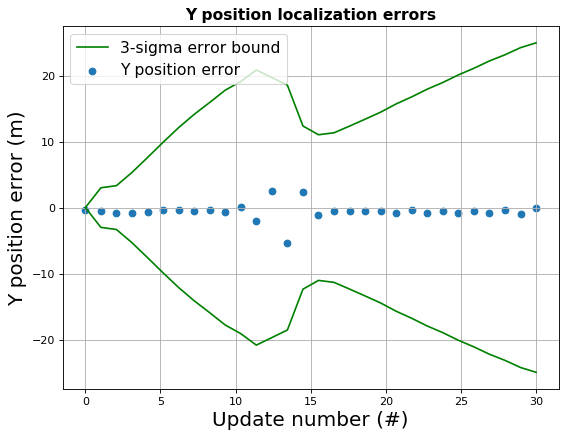

In [11]:
plot5 = plt.figure(figsize=(8, 6), dpi=80)
plt.grid(True)
line1 = plt.scatter(z[5], e_y_err, label="Y position error")
line2 = plt.plot(z[5], e_y_3sig, color='green', label="3-sigma error bound")
plt.plot(z[5], e_y_3sig_neg, color='green')
plt.ylabel('Y position error (m)', fontsize=18)
plt.xlabel('Update number (#)', fontsize=18)
plt.title('Y position localization errors', fontweight="bold", fontsize=14)
plt.legend(fontsize=14)